In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import numpy as np
from sklearn.metrics import log_loss

# Plot results of glm
- **make sure to run glm.py first!!**
- output of glm.py is a results.csv file in each respective group folder

In [20]:
### features to exclude from plots
# excludeftrs = ['wings', 'fmLS', 'fmFV', 'mfLS', 'mfFV']
excludeftrs = []

In [21]:
### manipulated groups that were run together and their respective controls
mani_Groups = [
    "AD_control_BD",
    "blind",
    "blind_deaf",
    "deaf",
]

### genetically manipulated groups and their respective controls
geno_groups = [
    "AD_control",
    "LC31_Kir",
    "vpoEN_Kir"
]

In [22]:
resultsDir = '/run/user/1000/gvfs/smb-share:server=tigress-cifs.princeton.edu,share=fileset-mmurthy/Kyle/code/edna/results'

In [44]:
### loading all results file into a big dataframe
allResults_mani = pd.DataFrame(columns=['group','feature', 'pCor', 'f1_score', 'logloss', 'deviance'])
for group in mani_Groups:
    resultsfile = os.path.join(resultsDir, group, '450_results.csv')
    results = pd.read_csv(resultsfile, usecols=['feature', 'pCor', 'f1_score', 'logloss', 'deviance'])
    results['group']=group
    allResults_mani = pd.concat([allResults_mani, results], ignore_index=True)

### loading all results file into a big dataframe
allResults_geno = pd.DataFrame(columns=['group','feature', 'pCor', 'f1_score', 'logloss', 'deviance'])
for group in geno_groups:
    resultsfile = os.path.join(resultsDir, group, '450_results.csv')
    results = pd.read_csv(resultsfile, usecols=['feature', 'pCor', 'f1_score', 'logloss','deviance'])
    results['group']=group
    allResults_geno = pd.concat([allResults_geno, results], ignore_index=True)

In [45]:
### excluding unwanted features and determining the plot order based on the control group
maniResults_simple = allResults_mani[~allResults_mani['feature'].isin(excludeftrs)]
order = maniResults_simple[maniResults_simple['group']=='AD_control_BD'].groupby('feature').mean().sort_values('deviance', ascending=False)
order = list(order.index)

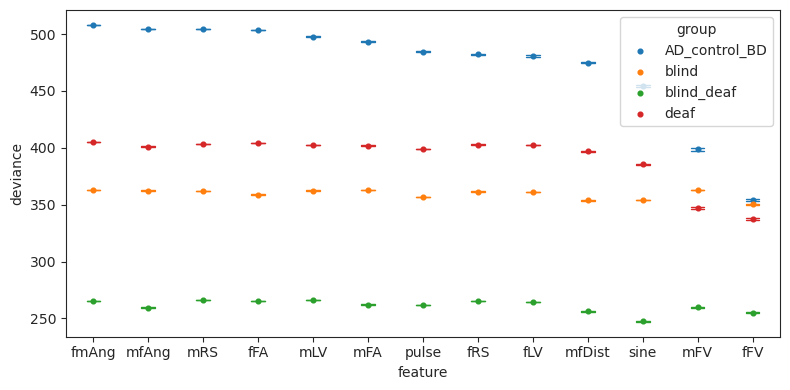

In [46]:
### plot one of the groups
sns.set_style('ticks')
plt.figure(figsize=(8,4))
sns.pointplot(data=maniResults_simple, x='feature', y='deviance', hue='group',
              dodge=False, join=False, order=order,
              scale=0.5, errorbar=('ci', 95), capsize=0.25, errwidth=1)
# plt.ylim(0.3,0.8)
# # plt.axhline(y=0.5, ls='--', c='gray', lw=1)
# plt.xticks(rotation=45, ha='right')
# # plt.ylabel('% correct predictions')
# plt.title('OE onset prediction(3s history)')
# sns.despine(bottom=True, trim=True)
#
plt.tight_layout()
# plt.savefig('results/OE_onset_prediction_manipulated_3s.png')

<AxesSubplot:xlabel='feature', ylabel='pCor'>

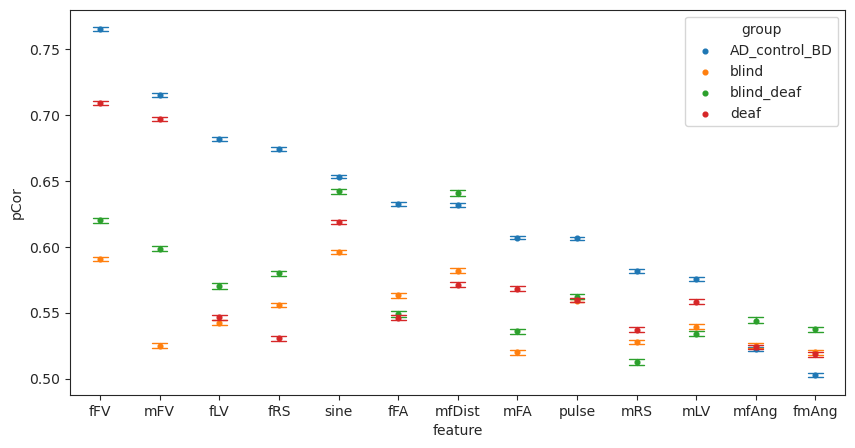

In [34]:
sns.set_style('ticks')
plt.figure(figsize=(10,5))
sns.pointplot(data=maniResults_simple, x='feature', y='pCor', hue='group',
              dodge=False, join=False, order=order,
              scale=0.5, errorbar=('ci', 95), capsize=0.25, errwidth=1)

In [9]:
### do the other group now
genoResults_simple = allResults_geno[~allResults_geno['feature'].isin(excludeftrs)]

order = genoResults_simple[genoResults_simple['group']=='AD_control'].groupby('feature').mean().sort_values('pCor', ascending=False)
order = list(order.index)

/tmp/ipykernel_61081/3620469769.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order = genoResults_simple[genoResults_simple['group']=='AD_control'].groupby('feature').mean().sort_values('pCor', ascending=False)


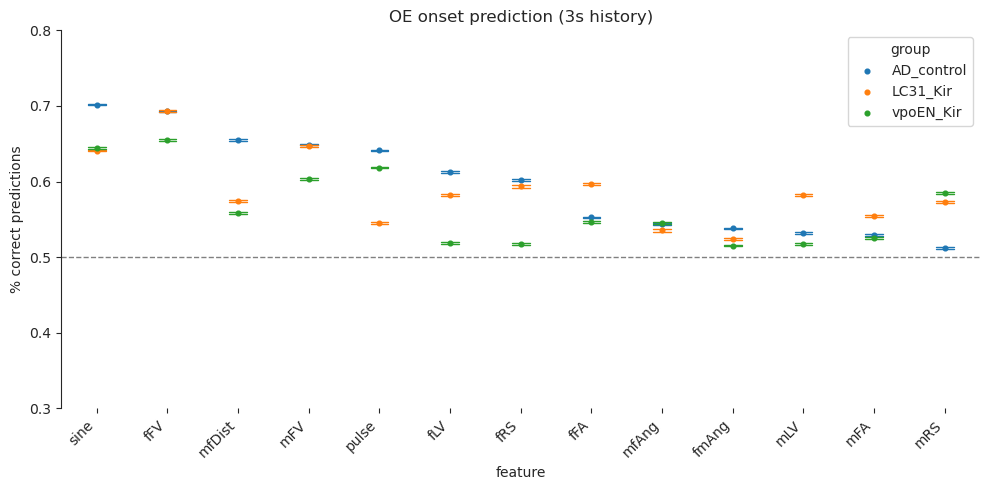

In [10]:
sns.set_style('ticks')
plt.figure(figsize=(10,5))
sns.pointplot(data=allResults_geno, x='feature', y='pCor', hue='group',
              dodge=False, join=False, order=order,
              scale=0.5, errorbar=('ci', 95), capsize=0.25, errwidth=1)
plt.ylim(0.3,0.8)
plt.axhline(y=0.5, ls='--', c='gray', lw=1)
plt.xticks(rotation=45, ha='right')
plt.ylabel('% correct predictions')
plt.title('OE onset prediction (3s history)')
sns.despine(bottom=True, trim=True)

plt.tight_layout()
# plt.savefig('results/OE_onset_prediction_silenced_3s.png')


## plotting 10s window

In [27]:
### loading all results file into a big dataframe
allResults_mani_10 = pd.DataFrame(columns=['group','feature', 'pCor', 'f1_score', 'logloss'])
for group in mani_Groups:
    results = pd.read_csv(rf'results/{group}/1500_results.csv', usecols=['feature', 'pCor', 'f1_score', 'logloss'])
    results['group']=group
    allResults_mani_10 = pd.concat([allResults_mani_10, results], ignore_index=True)

### loading all results file into a big dataframe
allResults_geno_10 = pd.DataFrame(columns=['group','feature', 'pCor', 'f1_score', 'logloss'])
for group in geno_groups:
    results = pd.read_csv(rf'results/{group}/1500_results.csv', usecols=['feature', 'pCor', 'f1_score', 'logloss'])
    results['group']=group
    allResults_geno_10 = pd.concat([allResults_geno_10, results], ignore_index=True)

In [28]:
### excluding unwanted features and determining the plot order based on the control group
allResults_mani_10 = allResults_mani_10[~allResults_mani_10['feature'].isin(excludeftrs)]
order = allResults_mani_10[allResults_mani_10['group']=='AD_control_BD'].groupby('feature').mean().sort_values('pCor', ascending=False)
order = list(order.index)

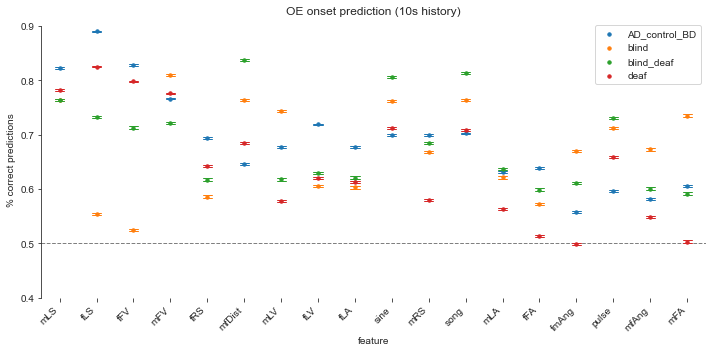

In [40]:
sns.set_style('ticks')
plt.figure(figsize=(10,5))
sns.pointplot(data=allResults_mani_10, x='feature', y='pCor', hue='group',
              dodge=False, join=False, order=order,
              scale=0.5, errorbar=('ci', 95), capsize=0.25, errwidth=1)
plt.ylim(0.4,0.91)
plt.axhline(y=0.5, ls='--', c='gray', lw=1)
plt.xticks(rotation=45, ha='right')
plt.ylabel('% correct predictions')
plt.title('OE onset prediction (10s history)')
plt.legend(loc='upper right')
sns.despine(bottom=True, trim=True)

plt.tight_layout()
plt.savefig('results/OE_onset_prediction_manipulated_10s.png')


In [37]:
### excluding unwanted features and determining the plot order based on the control group
allResults_geno_10 = allResults_geno_10[~allResults_geno_10['feature'].isin(excludeftrs)]
order = allResults_geno_10[allResults_geno_10['group']=='AD_control'].groupby('feature').mean().sort_values('pCor', ascending=False)
order = list(order.index)

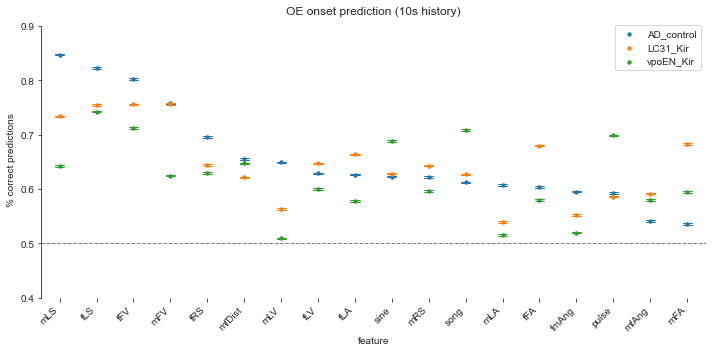

In [41]:
sns.set_style('ticks')
plt.figure(figsize=(10,5))
sns.pointplot(data=allResults_geno_10, x='feature', y='pCor', hue='group',
              dodge=False, join=False, order=order,
              scale=0.5, errorbar=('ci', 95), capsize=0.25, errwidth=1)
plt.ylim(0.4,0.91)
plt.axhline(y=0.5, ls='--', c='gray', lw=1)
plt.xticks(rotation=45, ha='right')
plt.ylabel('% correct predictions')
plt.title('OE onset prediction (10s history)')
plt.legend(loc='upper right')
sns.despine(bottom=True, trim=True)

plt.tight_layout()
plt.savefig('results/OE_onset_prediction_silenced_10s.png')


In [61]:
yTrue = np.zeros(1000)
yprobs = np.random.rand(1000)
yTrue[:500] = 1
# yprobs[] = 1
2*log_loss(yTrue, yTrue, normalize=False)


4.440892098500627e-13

In [50]:
np.random.rand(1000)

array([2.31607892e-01, 2.91465399e-01, 1.52220914e-02, 9.29742625e-01,
       7.91648172e-01, 1.22821397e-01, 6.58207653e-01, 7.13994805e-01,
       5.27713701e-01, 5.03024374e-03, 3.90416697e-01, 7.43577362e-01,
       6.73650924e-01, 6.35610509e-01, 7.53345492e-01, 9.69069259e-01,
       4.98336610e-01, 3.50344154e-01, 8.62756931e-01, 6.92258567e-01,
       6.78536297e-02, 9.62132481e-01, 4.22350298e-01, 8.46853271e-01,
       9.53037843e-01, 4.44072421e-02, 5.85601771e-01, 5.58989492e-01,
       4.42767113e-01, 8.86147832e-01, 9.77734722e-01, 5.25080101e-01,
       4.97464531e-01, 1.88912126e-01, 3.61200105e-01, 9.69673586e-01,
       9.14001372e-01, 4.79773772e-01, 4.87144205e-01, 6.71952996e-01,
       1.58672270e-01, 3.95899824e-01, 5.29568586e-01, 6.94093932e-01,
       7.62537031e-01, 5.67145327e-01, 6.25792489e-01, 4.97821300e-01,
       8.34994178e-01, 2.80870137e-01, 7.99555658e-01, 3.59818155e-01,
       9.11247063e-01, 1.72021280e-01, 5.06089863e-01, 5.56115605e-01,
      

18.02182669455857

In [8]:
yTrue

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0.